## Dataset description
The data set have 22 features and 253680 rows

The columns in detail:

HighBP : Indicates if the person has been told by a health professional that they have High Blood Pressure.

HighChol : Indicates if the person has been told by a health professional that they have High Blood Cholesterol.

CholCheck : Cholesterol Check, if the person has their cholesterol levels checked within the last 5 years.

BMI : Body Mass Index, calculated by dividing the persons weight (in kilogram) by the square of their height (in meters).

Smoker : Indicates if the person has smoked at least 100 cigarettes.
Stroke : Indicates if the person has a history of stroke.

Diabetes : Indicates if the person has a history of diabetes, or currently in pre-diabetes, or suffers from either type of diabetes.

PhysActivity : Indicates if the person has some form of physical activity in their day-to-day routine.

Fruits : Indicates if the person consumes 1 or more fruit(s) daily.
Veggies : Indicates if the person consumes 1 or more vegetable(s) daily.

HvyAlcoholConsump : Indicates if the person has more than 14 drinks per week.

AnyHealthcare : Indicates if the person has any form of health insurance.

NoDocbcCost : Indicates if the person wanted to visit a doctor within the past 1 year but couldn’t, due to cost.

GenHlth : Indicates the persons response to how well is their general health, ranging from 1 (excellent) to 5 (poor).

Menthlth : Indicates the number of days, within the past 30 days that the person had bad mental health.

PhysHlth : Indicates the number of days, within the past 30 days that the person had bad physical health.

DiffWalk : Indicates if the person has difficulty while walking or climbing stairs.

Sex : Indicates the gender of the person, where 0 is female and 1 is male.

Age: Indicates the age class of the person, where 1 is 18 years to 24 years up till 13 which is 80 years or older, each interval between has a 5-year increment.

Education: Indicates the highest year of school completed, with 0 being never attended or kindergarten only and 6 being, having attended 4 years of college or more.

Income: Indicates the total household income, ranging from 1 (at least $10,000) to 6 ($75,000+)

## **Step1:Import Libraries**

In [1]:
!pip install scikeras ## to download and install scikeras package

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import roc_curve, confusion_matrix, auc, classification_report
from imblearn.over_sampling import RandomOverSampler
from google.colab import drive
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay




from imblearn.over_sampling import SMOTE, ADASYN #check if needed or not

## **Step2: Load and Explore Data**

###Load the dataset


In [3]:
# Load your dataset
drive.mount('/content/drive')

# Change directory to where your file is located
%cd /content/drive/MyDrive

# Load data into a Pandas DataFrame
file_path = "heart_disease_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)


Mounted at /content/drive
/content/drive/MyDrive


###Explore the dataset


In [4]:
# Display the first few rows of the dataset
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
# Explore the unique values in each column
for elm in df:
    print(df[elm].value_counts())
    print("\n")

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


0.0    144851
1.0    108829
Name: HighBP, dtype: int64


0.0    146089
1.0    107591
Name: HighChol, dtype: int64


1.0    244210
0.0      9470
Name: CholCheck, dtype: int64


27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64


0.0    141257
1.0    112423
Name: Smoker, dtype: int64


0.0    243388
1.0     10292
Name: Stroke, dtype: int64


0.0    213703
2.0     35346
1.0      4631
Name: Diabetes, dtype: int64


1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64


1.0    160898
0.0     92782
Name: Fruits, dtype: int64


1.0    205841
0.0     47839
Name: Veggies, dtype: int64


0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64


1.0    241263
0.0     12417
Name: AnyHealthcare, dtype: int64


0.0    232326
1.0     21354
Name: NoDocbcCost, dtype: int64


2.

In [7]:
# Check for missing values
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
# Display the rows and columns of the dataset
df.shape

(253680, 22)

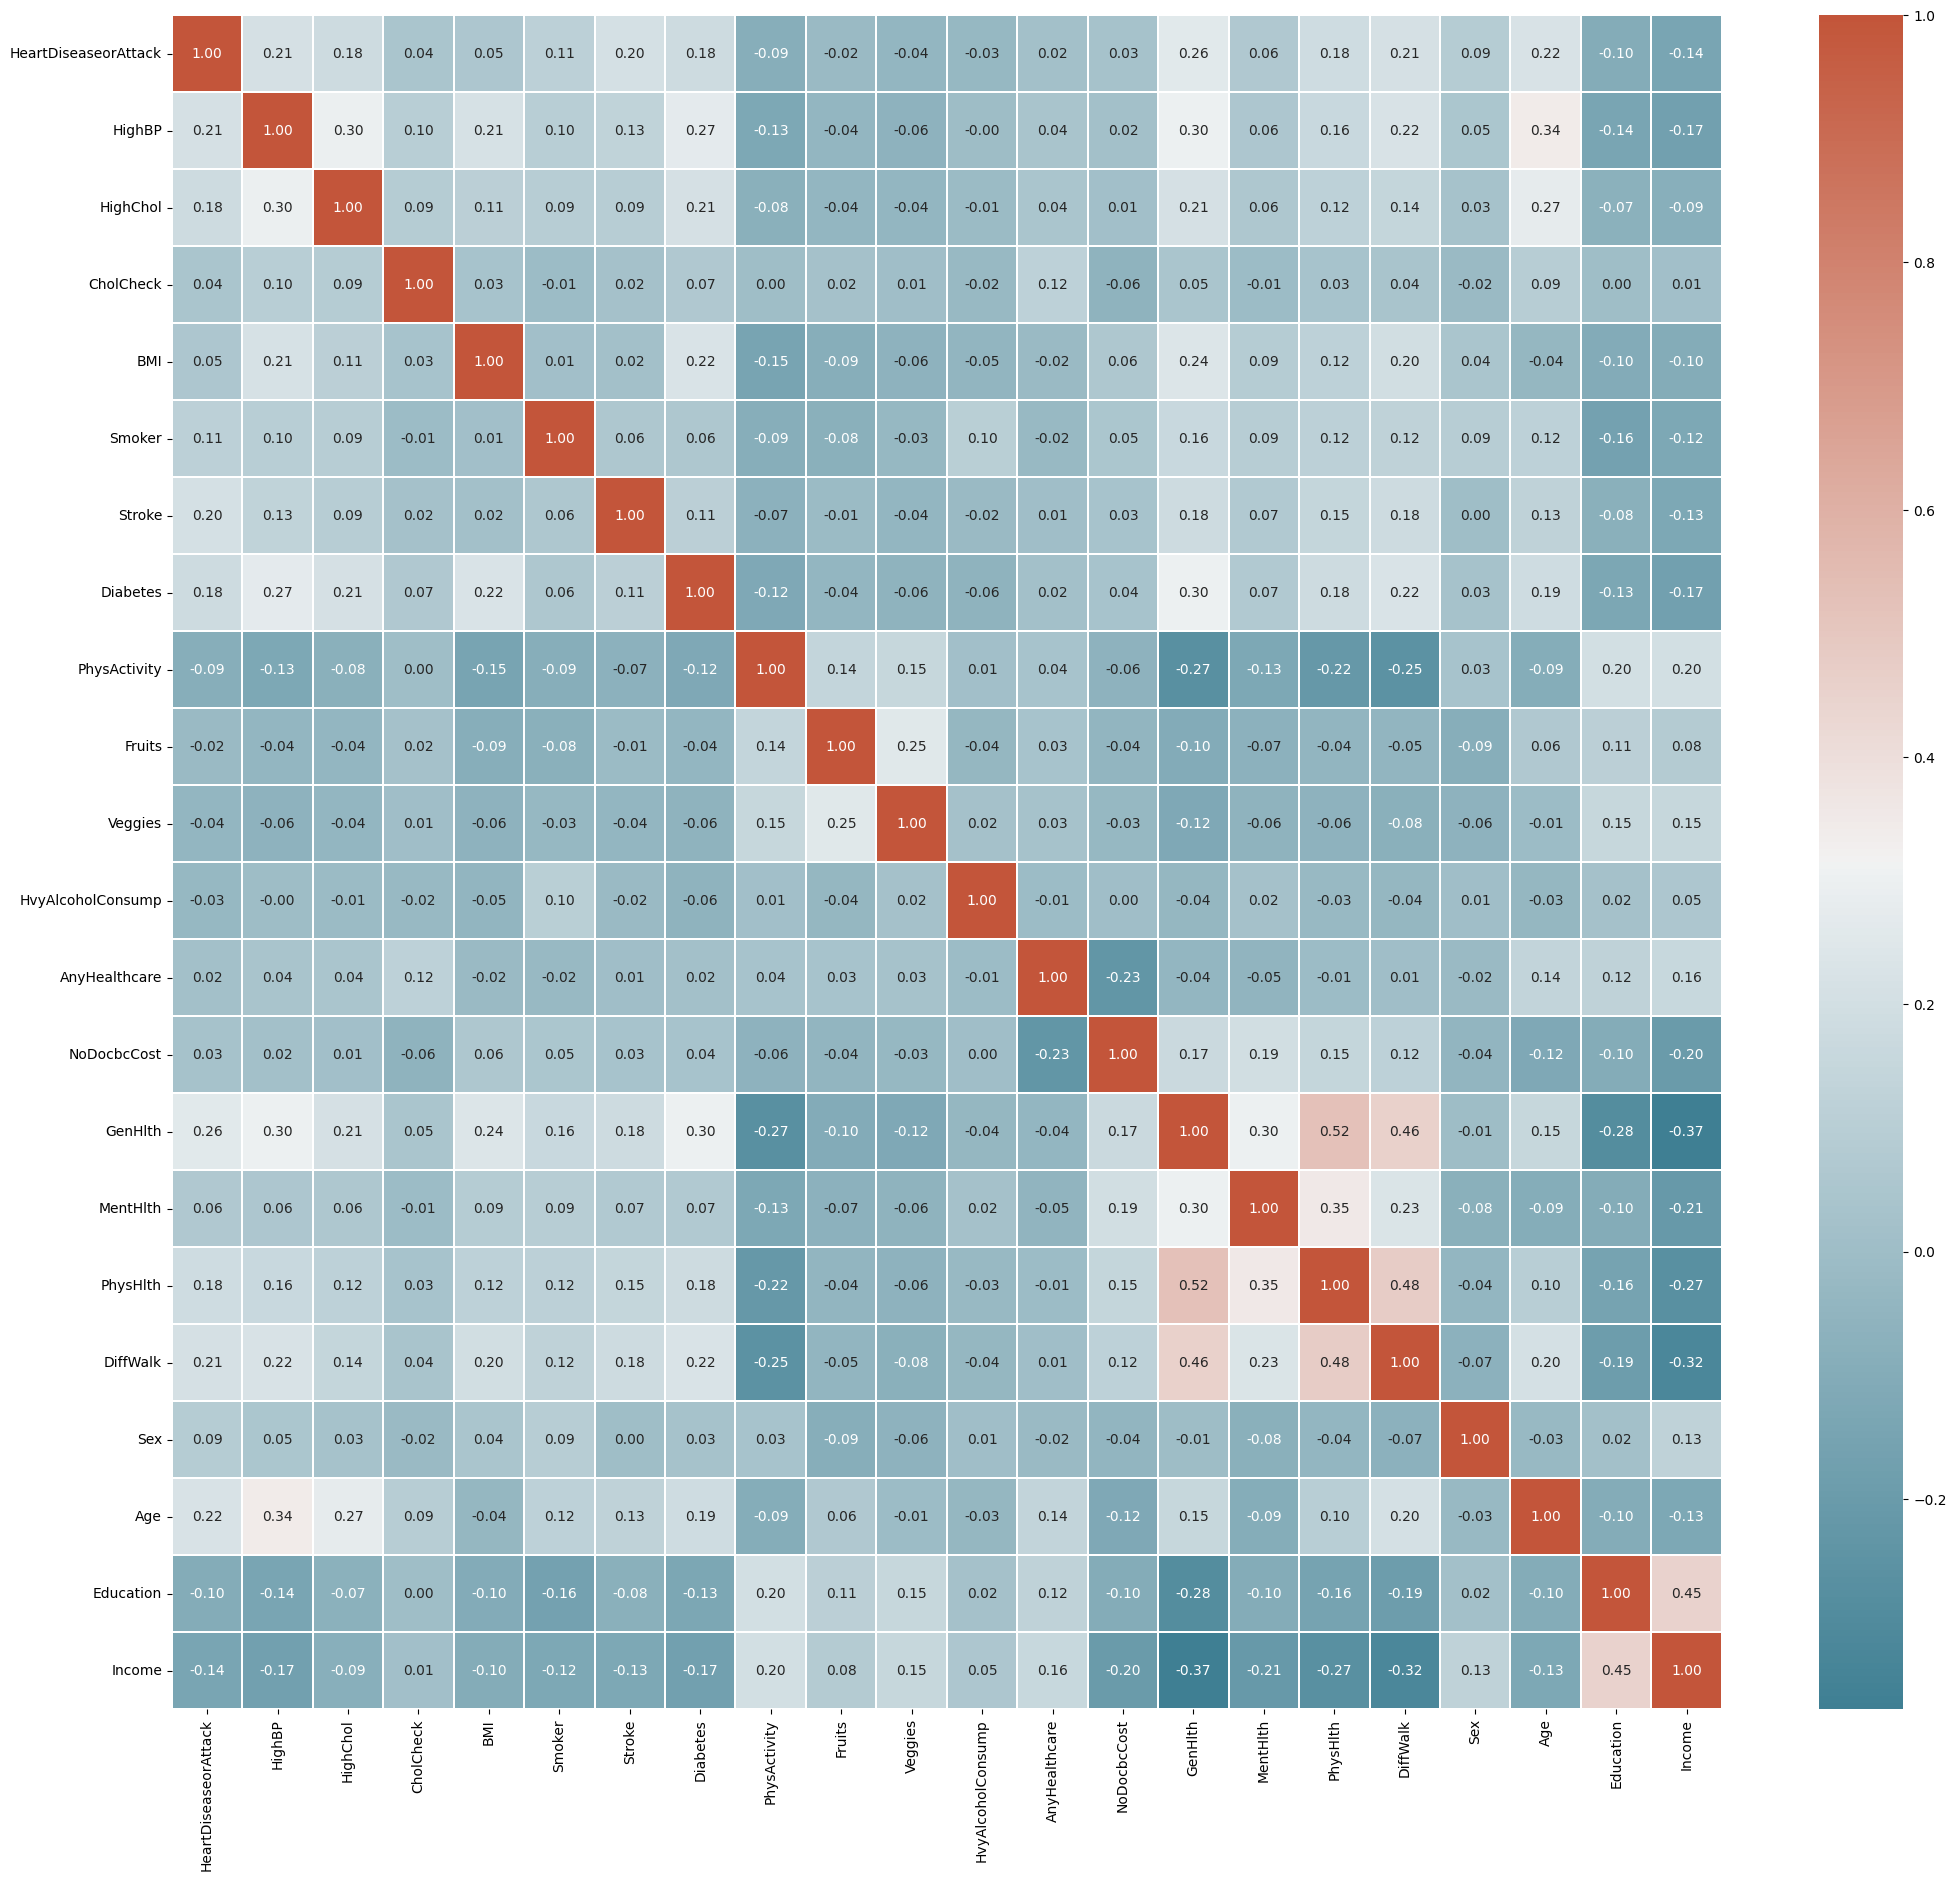

In [9]:
# Calculate correlation matrix
correlation = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 22))

# Define the custom color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap with annotated values
sns.heatmap(correlation, cmap=cmap, annot=True, fmt=".2f", linewidths=.2)

# Show the plot
plt.show()



We wanted to take a closer look into the features, because it seems like that some features are not really necessary. For example Education or Income musn't have exactly something to do with a HeartDiseaseOrAttack.

##**Step3: Data Preprocessing**

In [10]:
#dropping the data we don't want Income and Education since there is a strong relationship between them, which may cause confusion
df = df.drop(columns=['Income', 'Education'])

In [11]:
# One-hot encode categorical features: Age, GenHlth, Diabetes
encoder = OneHotEncoder(handle_unknown='ignore')
for feature in ['Age', 'GenHlth', 'Diabetes']:
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[feature]]).toarray())
    for column in encoder_df:
        encoder_df.rename(columns={column: f'{feature}_{column}'}, inplace=True)
    df = df.join(encoder_df)

# Drop original categorical columns
df = df.drop(['GenHlth', 'Diabetes', 'Age'], axis=1)

In [12]:
# Normalize selected numeric features: MentHlth, PhysHlth, BMI
scaler = MinMaxScaler(feature_range=(0, 1))
columns_to_normalize = ['MentHlth', 'PhysHlth', 'BMI']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df = df.round(2)

In [13]:
# This will display all columns after One-hot encode and Normalization
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,...,Age_11,Age_12,GenHlth_0,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,Diabetes_0,Diabetes_1,Diabetes_2
0,0.0,1.0,1.0,1.0,0.33,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.15,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.19,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.17,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.14,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,0.38,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
253676,0.0,1.0,1.0,1.0,0.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
253677,0.0,0.0,0.0,1.0,0.19,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
253678,0.0,1.0,0.0,1.0,0.13,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df.to_csv('preprocessed_data.csv', index=False)

We split data at this point. Right now there is no validation split. This will be done with fit methode in the training part.



###Class Imbalance Handling with Random Oversampling

In [15]:
# Split dataset into features (X) and target (Y) that we want to predict.
X = df.drop(columns='HeartDiseaseorAttack', axis=1)
Y = (df['HeartDiseaseorAttack'] == 1.0)

#check the count for each target
print('Data total')
print(f'Disease cases: {sum(Y):f}')
print(f'Healthy cases: {sum(~Y):f}')

Data total
Disease cases: 23893.000000
Healthy cases: 229787.000000


In [16]:
# Apply random oversampling to balance the classes
random_sampler = RandomOverSampler()
X, Y = random_sampler.fit_resample(X, Y)

print('Resampled data total')
print(f'Disease cases: {sum(Y):f}')
print(f'Healthy cases: {sum(~Y):f}')

Resampled data total
Disease cases: 229787.000000
Healthy cases: 229787.000000


##**Step4: Model Training and Testing Split**

In [17]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

We want to check if the classes are still balanced and if the split worked well. So we print out our data at this point.



In [18]:
print('Training Data check')
print(f'Disease cases: {sum(y_train):f}')
print(f'Healthy cases: {sum(~y_train):f}')

print('\nTest Data check')
print(f'Disease cases: {sum(y_test):f}')
print(f'Healthy cases: {sum(~y_test):f}')

print('\nValidation Data check')
print(f'Disease cases: {sum(y_val):f}')
print(f'Healthy cases: {sum(~y_val):f}')



Training Data check
Disease cases: 183874.000000
Healthy cases: 183785.000000

Test Data check
Disease cases: 22841.000000
Healthy cases: 23117.000000

Validation Data check
Disease cases: 23072.000000
Healthy cases: 22885.000000


## **Step5: Define functions**

In [19]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [20]:
def create_model(my_learning_rate):
    """
    Create and compile a deep neural network for binary classification.

    Parameters:
    - my_learning_rate: Learning rate for the Adam optimizer.

    Returns:
    A compiled Keras Sequential model.
    """

    # Create a sequential model
    model = tf.keras.models.Sequential()

    # Flatten the input features
    model.add(tf.keras.layers.Flatten(input_dim=X_train.shape[1]))

    # Add a dense hidden layer with 'relu' activation function
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))

    # Add a dropout regularization layer
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer with 1 unit for binary classification and sigmoid activation
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="binary_crossentropy",
                  metrics=['accuracy'])

    return model

In [21]:
# Define the create_model_n function for neurons
def create_model_n(neurons, my_learning_rate=0.003):
    """
    Create and compile a neural network model with a specified number of neurons.

    Parameters:
    - neurons: Number of neurons in the hidden layer.
    - my_learning_rate: Learning rate for the Adam optimizer.

    Returns:
    A compiled Keras Sequential model.
    """

    # Create a sequential model
    model = tf.keras.models.Sequential()

    # Flatten the input features
    model.add(tf.keras.layers.Flatten(input_dim=X_train.shape[1]))

    # Add a dense hidden layer with the specified number of neurons and 'relu' activation function
    model.add(tf.keras.layers.Dense(units=neurons, activation='relu'))

    # Add a dropout regularization layer
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer with 1 unit for binary classification
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="binary_crossentropy",
                  metrics=['accuracy'])

    return model

In [22]:
#@title Define the create_model_a function for activation

def create_model_a(activation, my_learning_rate=0.003):
    """
    Create and compile a neural network model with tunable hyperparameters.

    Parameters:
    - activation: Activation function for hidden layers (relu, sigmoid, linear).
    - my_learning_rate: Learning rate for the Adam optimizer.

    Returns:
    A compiled Keras sequential model.
    """

    # Create a sequential model
    model = tf.keras.models.Sequential()

    # Flatten the input features
    model.add(tf.keras.layers.Flatten(input_dim=X_train.shape[1]))

    # Define the first hidden layer with the specified activation function
    model.add(tf.keras.layers.Dense(units=32, activation=activation))

    # Add a dropout regularization layer
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer with 1 unit for binary classification (sigmoid activation)
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="binary_crossentropy",
                  metrics=['accuracy'])

    return model


In [23]:
def create_Best_model(neurons=32, activation='relu', my_learning_rate=0.003):
    """
    Create a neural network model with specified hyperparameters for binary classification.

    Parameters:
    - neurons: Number of neurons in the hidden layer.
    - activation: Activation function for the hidden layer.
    - my_learning_rate: Learning rate for the Adam optimizer.

    Returns:
    A compiled Keras Sequential model.
    """

    # Create a sequential model
    model = tf.keras.models.Sequential()

    # Flatten the input features
    model.add(tf.keras.layers.Flatten(input_dim=X_train.shape[1]))

    # Add a dense hidden layer with the specified number of neurons and activation function
    model.add(tf.keras.layers.Dense(units=neurons, activation=activation))

    # Add a dropout regularization layer
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer with 1 unit for binary classification and sigmoid activation
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="binary_crossentropy",
                  metrics=['accuracy'])

    return model


##**Step6: Hyperparameter Tuning - Grid Search**

## Tuning batch size and number of epochs

In [24]:
# create KerasClassifier model
model = KerasClassifier(model=create_model, my_learning_rate=0.003, verbose=2)

# define the grid search parameters
batch_size = [128, 512]
epochs = [10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)

## grid search for the batch size and number of epochs
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)
grid_result = grid.fit(X_train, y_train)


# Get the best batch size and epochs
best_batch_size = grid_result.best_params_['batch_size']
best_epochs = grid_result.best_params_['epochs']

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Epoch 1/20
719/719 - 2s - loss: 0.4936 - accuracy: 0.7635 - 2s/epoch - 3ms/step
Epoch 2/20
719/719 - 1s - loss: 0.4806 - accuracy: 0.7725 - 1s/epoch - 2ms/step
Epoch 3/20
719/719 - 1s - loss: 0.4796 - accuracy: 0.7738 - 1s/epoch - 2ms/step
Epoch 4/20
719/719 - 2s - loss: 0.4791 - accuracy: 0.7739 - 2s/epoch - 3ms/step
Epoch 5/20
719/719 - 2s - loss: 0.4787 - accuracy: 0.7743 - 2s/epoch - 3ms/step
Epoch 6/20
719/719 - 2s - loss: 0.4780 - accuracy: 0.7745 - 2s/epoch - 3ms/step
Epoch 7/20
719/719 - 2s - loss: 0.4776 - accuracy: 0.7749 - 2s/epoch - 3ms/step
Epoch 8/20
719/719 - 1s - loss: 0.4776 - accuracy: 0.7750 - 1s/epoch - 2ms/step
Epoch 9/20
719/719 - 1s - loss: 0.4773 - accuracy: 0.7751 - 1s/epoch - 2ms/step
Epoch 10/20
719/719 - 1s - loss: 0.4774 - accuracy: 0.7746 - 1s/epoch - 2ms/step
Epoch 11/20
719/719 - 1s - loss: 0.4771 - accuracy: 0.7753 - 1s/epoch - 2ms/step
Epoch 12/20
719/719 - 1s - loss: 0.4772 - accuracy: 0.7753

## Tuning the Number of Neurons in the hidden layers

In [25]:
# create KerasClassifier model for neurons
model_neurons = KerasClassifier(model=create_model_n, my_learning_rate=0.003, verbose=2)

# define the grid search parameters for neurons
param_grid_neurons = {'model__neurons': [32, 64, 128]}

# Grid search for neurons
grid_neurons = GridSearchCV(estimator=model_neurons, param_grid=param_grid_neurons, n_jobs=-1, cv=3, verbose=2)
grid_result_neurons = grid_neurons.fit(X_train, y_train)

# Get the best number of neurons
best_neurons = grid_result_neurons.best_params_['model__neurons']

# Print grid search results for neurons
print("Best: %f using %s" % (grid_result_neurons.best_score_, grid_result_neurons.best_params_))
means_neurons = grid_result_neurons.cv_results_['mean_test_score']
stds_neurons = grid_result_neurons.cv_results_['std_test_score']
params_neurons = grid_result_neurons.cv_results_['params']
for mean, stdev, param in zip(means_neurons, stds_neurons, params_neurons):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
11490/11490 - 21s - loss: 0.4836 - accuracy: 0.7702 - 21s/epoch - 2ms/step
Best: 0.773529 using {'model__neurons': 128}
0.772819 (0.000889) with: {'model__neurons': 32}
0.773410 (0.001040) with: {'model__neurons': 64}
0.773529 (0.001334) with: {'model__neurons': 128}


##  Tuning the Activtion Function in the hidden layers

In [26]:
model = KerasClassifier(model=create_model_a, my_learning_rate=0.003, verbose=2)

# define the grid search parameters

param_grid1 = {
    'model__activation': ['relu', 'sigmoid', 'linear']
}

# Grid search for activation function
grid_activation = GridSearchCV(estimator=model, param_grid=param_grid1,  n_jobs=-1, cv=3, verbose=2)
grid_result_activation = grid_activation.fit(X_train, y_train)

# Get the best activation function
best_activation = grid_result_activation.best_params_['model__activation']

# Print grid search results for activation function
print("Best: %f using %s" % (grid_result_activation.best_score_, grid_result_activation.best_params_))
means_activation = grid_result_activation.cv_results_['mean_test_score']
stds_activation = grid_result_activation.cv_results_['std_test_score']
params_activation = grid_result_activation.cv_results_['params']
for mean, stdev, param in zip(means_activation, stds_activation, params_activation):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
11490/11490 - 19s - loss: 0.4858 - accuracy: 0.7693 - 19s/epoch - 2ms/step
Best: 0.772490 using {'model__activation': 'relu'}
0.772490 (0.001395) with: {'model__activation': 'relu'}
0.770994 (0.001051) with: {'model__activation': 'sigmoid'}
0.768905 (0.004814) with: {'model__activation': 'linear'}


##**Step7: Final Model Creation and Training**


In [27]:
# Print and use the best parameters as needed
print("Best batch size:", best_batch_size)
print("Best epochs:", best_epochs)
print("Best number of neurons:", best_neurons)
print("Best activation function:", best_activation)

# Create the best model with the best parameters using create_Best_model
best_model = create_Best_model(
    neurons=best_neurons,
    activation=best_activation,
    my_learning_rate=0.003
)

# Compile the model with a learning rate
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the best model with specified batch size and epochs
history = best_model.fit(X_train, y_train, epochs=best_epochs,
                         batch_size=best_batch_size, validation_data=(X_val, y_val))

Best batch size: 512
Best epochs: 20
Best number of neurons: 128
Best activation function: relu
Epoch 1/20
719/719 [==============================] - 5s 6ms/step - loss: 0.5674 - accuracy: 0.7110 - val_loss: 0.4922 - val_accuracy: 0.7684
Epoch 2/20
719/719 [==============================] - 3s 4ms/step - loss: 0.4928 - accuracy: 0.7646 - val_loss: 0.4810 - val_accuracy: 0.7734
Epoch 3/20
719/719 [==============================] - 3s 4ms/step - loss: 0.4868 - accuracy: 0.7677 - val_loss: 0.4786 - val_accuracy: 0.7742
Epoch 4/20
719/719 [==============================] - 3s 4ms/step - loss: 0.4842 - accuracy: 0.7689 - val_loss: 0.4776 - val_accuracy: 0.7744
Epoch 5/20
719/719 [==============================] - 4s 5ms/step - loss: 0.4828 - accuracy: 0.7700 - val_loss: 0.4767 - val_accuracy: 0.7748
Epoch 6/20
719/719 [==============================] - 4s 6ms/step - loss: 0.4816 - accuracy: 0.7711 - val_loss: 0.4761 - val_accuracy: 0.7754
Epoch 7/20
719/719 [==============================] 

##**Step8: Model Evaluation and Visualization**




 Evaluate the new model against the test set:
90/90 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7732


[0.47798052430152893, 0.7732495069503784]

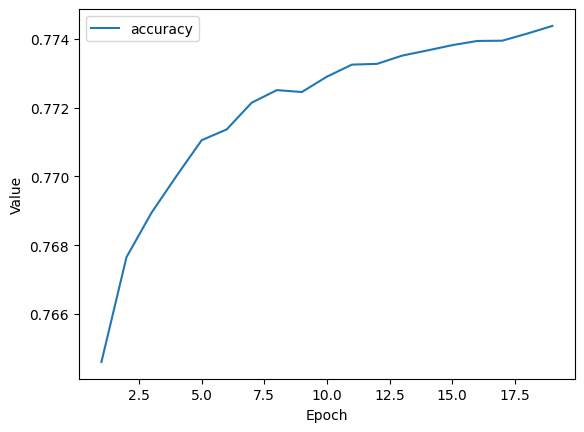

In [28]:
# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(history.epoch, history.history, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
best_model.evaluate(x=X_test, y=y_test, batch_size=best_batch_size)

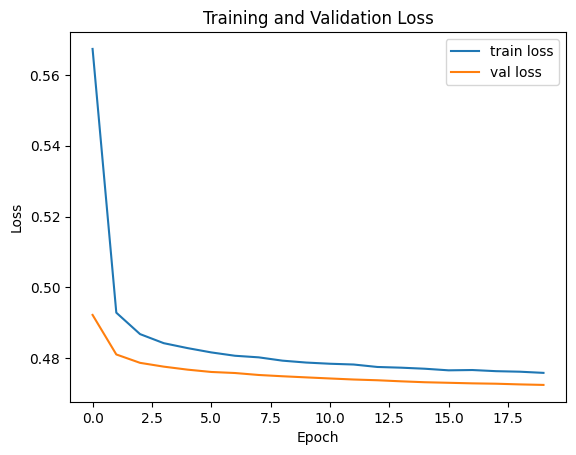

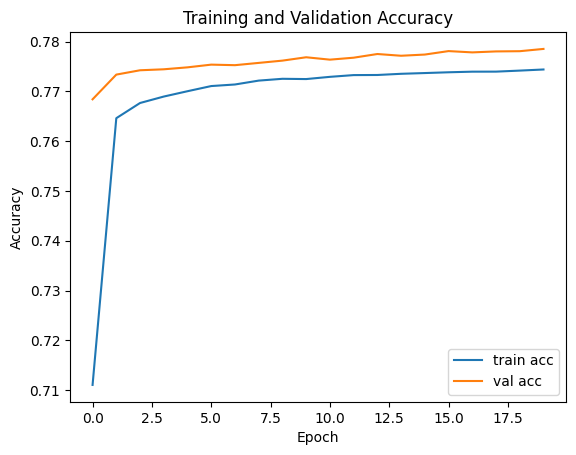

In [32]:
# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

##  Model Evaluation on Test Set



In [29]:
# Evaluate the model on the test set
y_test_pred_probs = best_model.predict(X_test)
y_test_pred_binary = np.round(y_test_pred_probs).astype(int)

# Display the final model training results
print("\nFinal model training results:")
print("Best number of neurons:", best_neurons)
print("Best activation function:", best_activation)
print("Best batch size:", best_batch_size)
print("Best epochs:", best_epochs)

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_binary))


1437/1437 [==============================] - 3s 2ms/step

Final model training results:
Best number of neurons: 128
Best activation function: relu
Best batch size: 512
Best epochs: 20

Test Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.73      0.76     23117
        True       0.75      0.82      0.78     22841

    accuracy                           0.77     45958
   macro avg       0.78      0.77      0.77     45958
weighted avg       0.78      0.77      0.77     45958



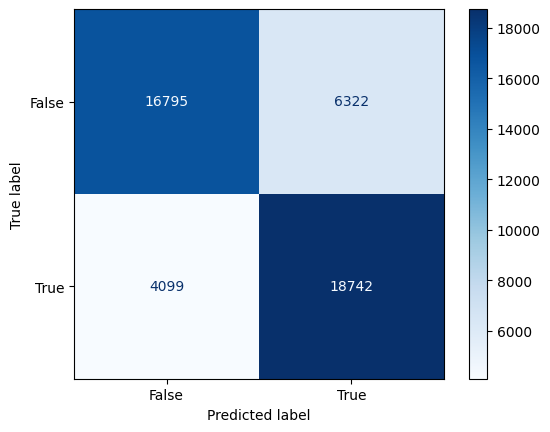

In [30]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_binary)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
cm_display.plot(cmap='Blues')
plt.show()


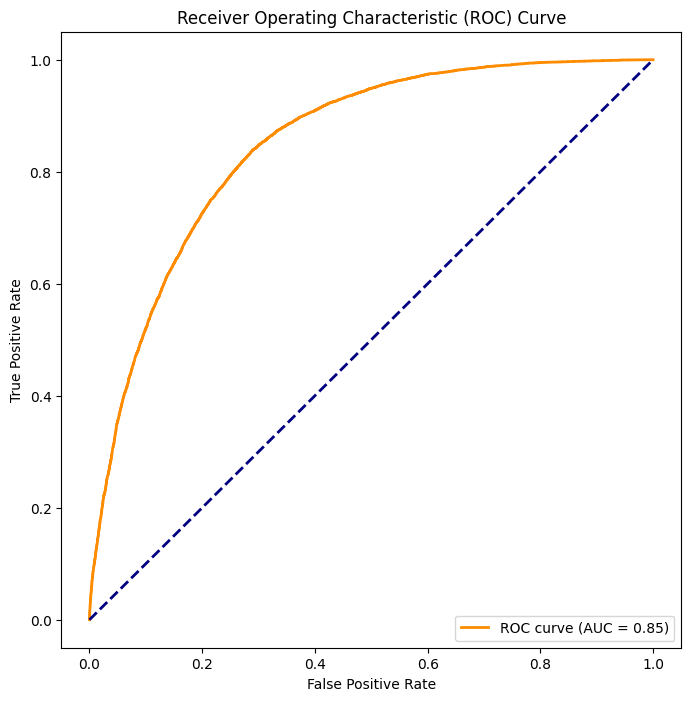

In [31]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##**Step9: Save the Model**


In [33]:
# Save the entire model
best_model.save('NN_HeartDiseaseHealthIndicators_Dataset.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
